In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 

import cv2
import sklearn.metrics as metrics
from tensorflow.keras.layers import AveragePooling2D,GlobalAveragePooling2D,Concatenate,Lambda
from tensorflow.keras import backend

In [2]:
import os
os.chdir(r'D:\Intelligent Systems\Pattern Recognition Systems\PR-project\images\images\fashion')
df = pd.read_csv('data_dresses.csv',sep=';')

df = df.dropna(axis=0, subset=['pattern'])
df = df.reset_index(drop=True)

In [3]:
#shape = (200,200)  
images = []  
img_labels = []
for i in range(int(len(df))):
    img = cv2.imread(df['img_path'][i])
    #img = cv2.resize(img,shape)
    images.append(img)
    img_labels.append(df['pattern'][i])
    
    
labels = pd.get_dummies(img_labels).values    
labelname = pd.get_dummies(img_labels).columns

In [4]:
trlen = int(len(images)*0.75)
tslen = len(images)-trlen
trDat = images[:trlen]
trLbl = labels[:trlen]

tsDat = images[trlen:]
tsLbl = labels[trlen:]

trDat = np.array(trDat)
tsDat = np.array(tsDat)

imgrows         = trDat[0].shape[0]
imgclms         = trDat[0].shape[1]
channel         = trDat[0].shape[2]
num_classes     = len(np.unique(img_labels))

1854 619


In [5]:
os.chdir(r'D:\Intelligent Systems\Pattern Recognition Systems\PR-project\jupytermodel')

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import add
from tensorflow.keras.layers import AveragePooling2D
import sklearn.metrics as metrics

optmz       = optimizers.RMSprop(lr=0.0001) 
def createModel():
    inputs = Input(shape=(imgrows,imgclms,channel))
    x = Conv2D(32,(3,3),padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32,(3,3),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(32,(3,3),padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32,(3,3),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(64,(3,3),padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64,(3,3),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(128,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Conv2D(128,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(64,activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes,activation='softmax')(x) 
    
    model = Model(inputs=inputs,outputs=x) 

    model.compile(loss='categorical_crossentropy', 
                  optimizer=optmz, 
                  metrics=['accuracy'])


    return model

                                                                                # Step 4
model       = createModel() # This is meant for training


In [7]:
modelname       = 'pattern_pred_conv_5'    
folderpath      = 'D:\\Intelligent Systems\\Pattern Recognition Systems\\PR-project\\jupytermodel\\'
filepath        = folderpath + modelname + ".hdf5"
model.load_weights(filepath)

In [8]:
from numpy.random import seed
seed(1337)

import tensorflow
tensorflow.random.set_seed(42)
#from tensorflow import set_random_seed
#set_random_seed(42)

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


modelname       = 'pattern_pred_vgg_5'                                                                                # Step 1
folderpath      = 'D:\\Intelligent Systems\\Pattern Recognition Systems\\PR-project\\jupytermodel\\'
filepath        = folderpath + modelname + ".hdf5"
model_1 = models.load_model(filepath)
#model_1.layers[-3].name='dense1'
model_1.layers[-1]._name='dense_final'

img_height, img_width = 256,256
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, 
                        pooling='max', input_shape = (img_width, img_height, 3))
                        model_1 = models.Sequential()
model_1.add(conv_base)
model_1.add(layers.Dense(nb_categories, activation='softmax'))
model_1.summary()

In [9]:
def resLyr(inputs,
           numFilters=16,
           kernelSz=3,
           strides=1,
           activation='relu',
           batchNorm=True,
           convFirst=True,
           lyrName=None):

    convLyr     = Conv2D(numFilters,
                         kernel_size=kernelSz,
                         strides=strides,
                         padding='same',
                         kernel_initializer='he_normal',
                         kernel_regularizer=l2(1e-4),
                         name=lyrName+'_conv' if lyrName else None)
    x           = inputs
    
    if convFirst:
        x       = convLyr(x)
        
        if batchNorm:
            x   = BatchNormalization(name=lyrName+'_bn' if lyrName else None)(x)
            
        if activation is not None:
            x   = Activation(activation,
                             name=lyrName+'_'+activation if lyrName else None)(x)
    else:
        if batchNorm:
            x   = BatchNormalization(name=lyrName+'_bn' if lyrName else None)(x)
            
        if activation is not None:
            x   = Activation(activation,
                             name=lyrName+'_'+activation if lyrName else None)(x)
            
        x       = convLyr(x)
    return x

                                                                                # Step 4
def resBlkV1(inputs,
             numFilters=16,
             numBlocks=3,
             downsampleOnFirst=True,
             names=None):
    
    x       = inputs
    
    for run in range(0,numBlocks):
        strides = 1
        blkStr  = str(run+1)
        
        if downsampleOnFirst and run == 0:
            strides     = 2
            
        y       = resLyr(inputs=x,
                         numFilters=numFilters,
                         strides=strides,
                         lyrName=names+'_Blk'+blkStr+'_Res1' if names else None)
        y       = resLyr(inputs=y,
                         numFilters=numFilters,
                         activation=None,
                         lyrName=names+'_Blk'+blkStr+'_Res2' if names else None)
        
        if downsampleOnFirst and run == 0:
            x   = resLyr(inputs=x,
                         numFilters=numFilters,
                         kernelSz=1,
                         strides=strides,
                         activation=None,
                         batchNorm=False,
                         lyrName=names+'_Blk'+blkStr+'_lin' if names else None)

        x       = add([x,y],
                      name=names+'_Blk'+blkStr+'_add' if names else None)
        x       = Activation('relu',
                             name=names+'_Blk'+blkStr+'_relu' if names else None)(x)
        
    return x
    
                                                                                # Step 5
def createResNetV1(inputShape=(imgrows,imgclms,channel), numClasses=num_classes):
    inputs = Input(shape=inputShape)
    v = resLyr(inputs,lyrName='Inpt')
    v = resBlkV1(inputs=v,numFilters=16,numBlocks=3,downsampleOnFirst=False,names='Stg1')
    v = resBlkV1(inputs=v,numFilters=32,numBlocks=3,downsampleOnFirst=True,names='Stg2')
    v = resBlkV1(inputs=v,numFilters=64,numBlocks=3,downsampleOnFirst=True,names='Stg4')
    v = AveragePooling2D(pool_size=4,name='AvgPool')(v)
    v = Flatten()(v)
    outputs = Dense(numClasses,activation='softmax',kernel_initializer='he_normal')(v)
    model = Model(inputs=inputs,outputs=outputs)
    model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']) 

    return model

                                                                                # Step 6
model_2       = createResNetV1() 

In [10]:
modelname       = 'pattern_pred_resnet1'                                                                                # Step 1
folderpath      = 'D:\\Intelligent Systems\\Pattern Recognition Systems\\PR-project\\jupytermodel\\'
filepath        = folderpath + modelname + ".hdf5"
model_2.load_weights(filepath)

In [11]:
###Convolutional Block
def conv2d(x,numfilt,filtsz,strides=1,pad='same',act=True,name=None):
    x = Conv2D(numfilt,filtsz,strides,padding=pad,data_format='channels_last',use_bias=False,name=name+'conv2d')(x)
    x = BatchNormalization(axis=3,scale=False,name=name+'conv2d'+'bn')(x)
    if act:
        x = Activation('relu',name=name+'conv2d'+'act')(x)
    return x

##Inception ResNet A block
def incresA(x,scale,name=None):
    pad = 'same'
    branch0 = conv2d(x,32,1,1,pad,True,name=name+'b0')
    branch1 = conv2d(x,32,1,1,pad,True,name=name+'b1_1')
    branch1 = conv2d(branch1,32,3,1,pad,True,name=name+'b1_2')
    branch2 = conv2d(x,32,1,1,pad,True,name=name+'b2_1')
    branch2 = conv2d(branch2,48,3,1,pad,True,name=name+'b2_2')
    branch2 = conv2d(branch2,64,3,1,pad,True,name=name+'b2_3')
    branches = [branch0,branch1,branch2]
    mixed = Concatenate(axis=3, name=name + '_concat')(branches)
    filt_exp_1x1 = conv2d(mixed,384,1,1,pad,False,name=name+'filt_exp_1x1')
    final_lay = Lambda(lambda inputs, scale: inputs[0] + inputs[1] * scale,
                      output_shape=backend.int_shape(x)[1:],
                      arguments={'scale': scale},
                      name=name+'act_scaling')([x, filt_exp_1x1])
    return final_lay


##Stem block
img_input = Input(shape=(imgrows,imgclms,channel))

x = conv2d(img_input,32,3,2,'valid',True,name='conv1')
x = conv2d(x,32,3,1,'valid',True,name='conv2')
x = conv2d(x,64,3,1,'valid',True,name='conv3')

x_11 = MaxPooling2D(3,strides=1,padding='valid',name='stem_br_11'+'_maxpool_1')(x)
x_12 = conv2d(x,64,3,1,'valid',True,name='stem_br_12')

x = Concatenate(axis=3, name = 'stem_concat_1')([x_11,x_12])

x_21 = conv2d(x,64,1,1,'same',True,name='stem_br_211')
x_21 = conv2d(x_21,64,[1,7],1,'same',True,name='stem_br_212')
x_21 = conv2d(x_21,64,[7,1],1,'same',True,name='stem_br_213')
x_21 = conv2d(x_21,96,3,1,'valid',True,name='stem_br_214')

x_22 = conv2d(x,64,1,1,'same',True,name='stem_br_221')
x_22 = conv2d(x_22,96,3,1,'valid',True,name='stem_br_222')

x = Concatenate(axis=3, name = 'stem_concat_2')([x_21,x_22])

x_31 = conv2d(x,192,3,1,'valid',True,name='stem_br_31')
x_32 = MaxPooling2D(3,strides=1,padding='valid',name='stem_br_32'+'_maxpool_2')(x)
x = Concatenate(axis=3, name = 'stem_concat_3')([x_31,x_32])


##Inception-ResNet Network
x = incresA(x,0.15,name='incresA_1')

#35 × 35 to 17 × 17 reduction module.
x_red_11 = MaxPooling2D(3,strides=2,padding='valid',name='red_maxpool_1')(x)
x_red_12 = conv2d(x,384,3,2,'valid',True,name='x_red1_c1')
x_red_13 = conv2d(x,256,1,1,'same',True,name='x_red1_c2_1')
x_red_13 = conv2d(x_red_13,256,3,1,'same',True,name='x_red1_c2_2')
x_red_13 = conv2d(x_red_13,384,3,2,'valid',True,name='x_red1_c2_3')

x = Concatenate(axis=3, name='red_concat_1')([x_red_11,x_red_12,x_red_13])

#17 × 17 to 8 × 8 reduction module.
x_red_21 = MaxPooling2D(3,strides=2,padding='valid',name='red_maxpool_2')(x)

x_red_22 = conv2d(x,256,1,1,'same',True,name='x_red2_c11')
x_red_22 = conv2d(x_red_22,384,3,2,'valid',True,name='x_red2_c12')

x_red_23 = conv2d(x,256,1,1,'same',True,name='x_red2_c21')
x_red_23 = conv2d(x_red_23,256,3,2,'valid',True,name='x_red2_c22')

x_red_24 = conv2d(x,256,1,1,'same',True,name='x_red2_c31')
x_red_24 = conv2d(x_red_24,256,3,1,'same',True,name='x_red2_c32')
x_red_24 = conv2d(x_red_24,256,3,2,'valid',True,name='x_red2_c33')

x = Concatenate(axis=3, name='red_concat_2')([x_red_21,x_red_22,x_red_23,x_red_24])


#TOP
x = GlobalAveragePooling2D(data_format='channels_last')(x)
x = Dropout(0.6)(x)
x = Dense(num_classes, activation='softmax')(x)


In [12]:
model_3 = Model(img_input,x,name='inception_resnet_v2')
modelname       = 'pattern_pred_inceptionresnet_5'                                                                                # Step 1
folderpath      = 'D:\\Intelligent Systems\\Pattern Recognition Systems\\PR-project\\jupytermodel\\'
filepath        = folderpath + modelname + ".hdf5"
model_3.load_weights(filepath)


In [13]:
def createModel():
    inputs = Input(shape=(imgrows, imgclms, channel))
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optmz,
                  metrics=['accuracy'])

    return model


model_4 = createModel() 

In [14]:
modelname       = 'GANFashionModelSetGeneratorpattern_pred_conv_n'                                                                                # Step 1
folderpath      = 'D:\\Intelligent Systems\\Pattern Recognition Systems\\PR-project\\jupytermodel\\'
filepath        = folderpath + modelname + ".hdf5"
model_4.load_weights(filepath)

In [15]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from numpy import argmax
import IPython

In [16]:
all_models = list()

all_models.append(model)
all_models.append(model_1)
all_models.append(model_2)
all_models.append(model_3)
all_models.append(model_4)

In [17]:
from tensorflow.keras import backend

In [18]:
def define_stacked_model(members):
    # update all layers in all models to not be trainable
    for i in range(len(members)):
        model = members[i]
        for layer in model.layers:
            # make not trainable
            layer.trainable = False
            # rename to avoid 'unique layer name' issue
            #layer.name = 'ensemble_' + str(i+1) + '_' + layer.name
    # define multi-headed input
    ensemble_visible = [model.input for model in members]
    # concatenate merge output from each model
    ensemble_outputs = [model.output for model in members]
    merge = Concatenate()(ensemble_outputs)
    hidden = Dense(10, activation='relu',name ="final_1")(merge)
    output = Dense(num_classes, activation='softmax', name="final_2")(hidden)
    model = Model(inputs=ensemble_visible, outputs=output)
    # plot graph of ensemble
    #plot_model(model, show_shapes=True, to_file='model_graph.png')
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

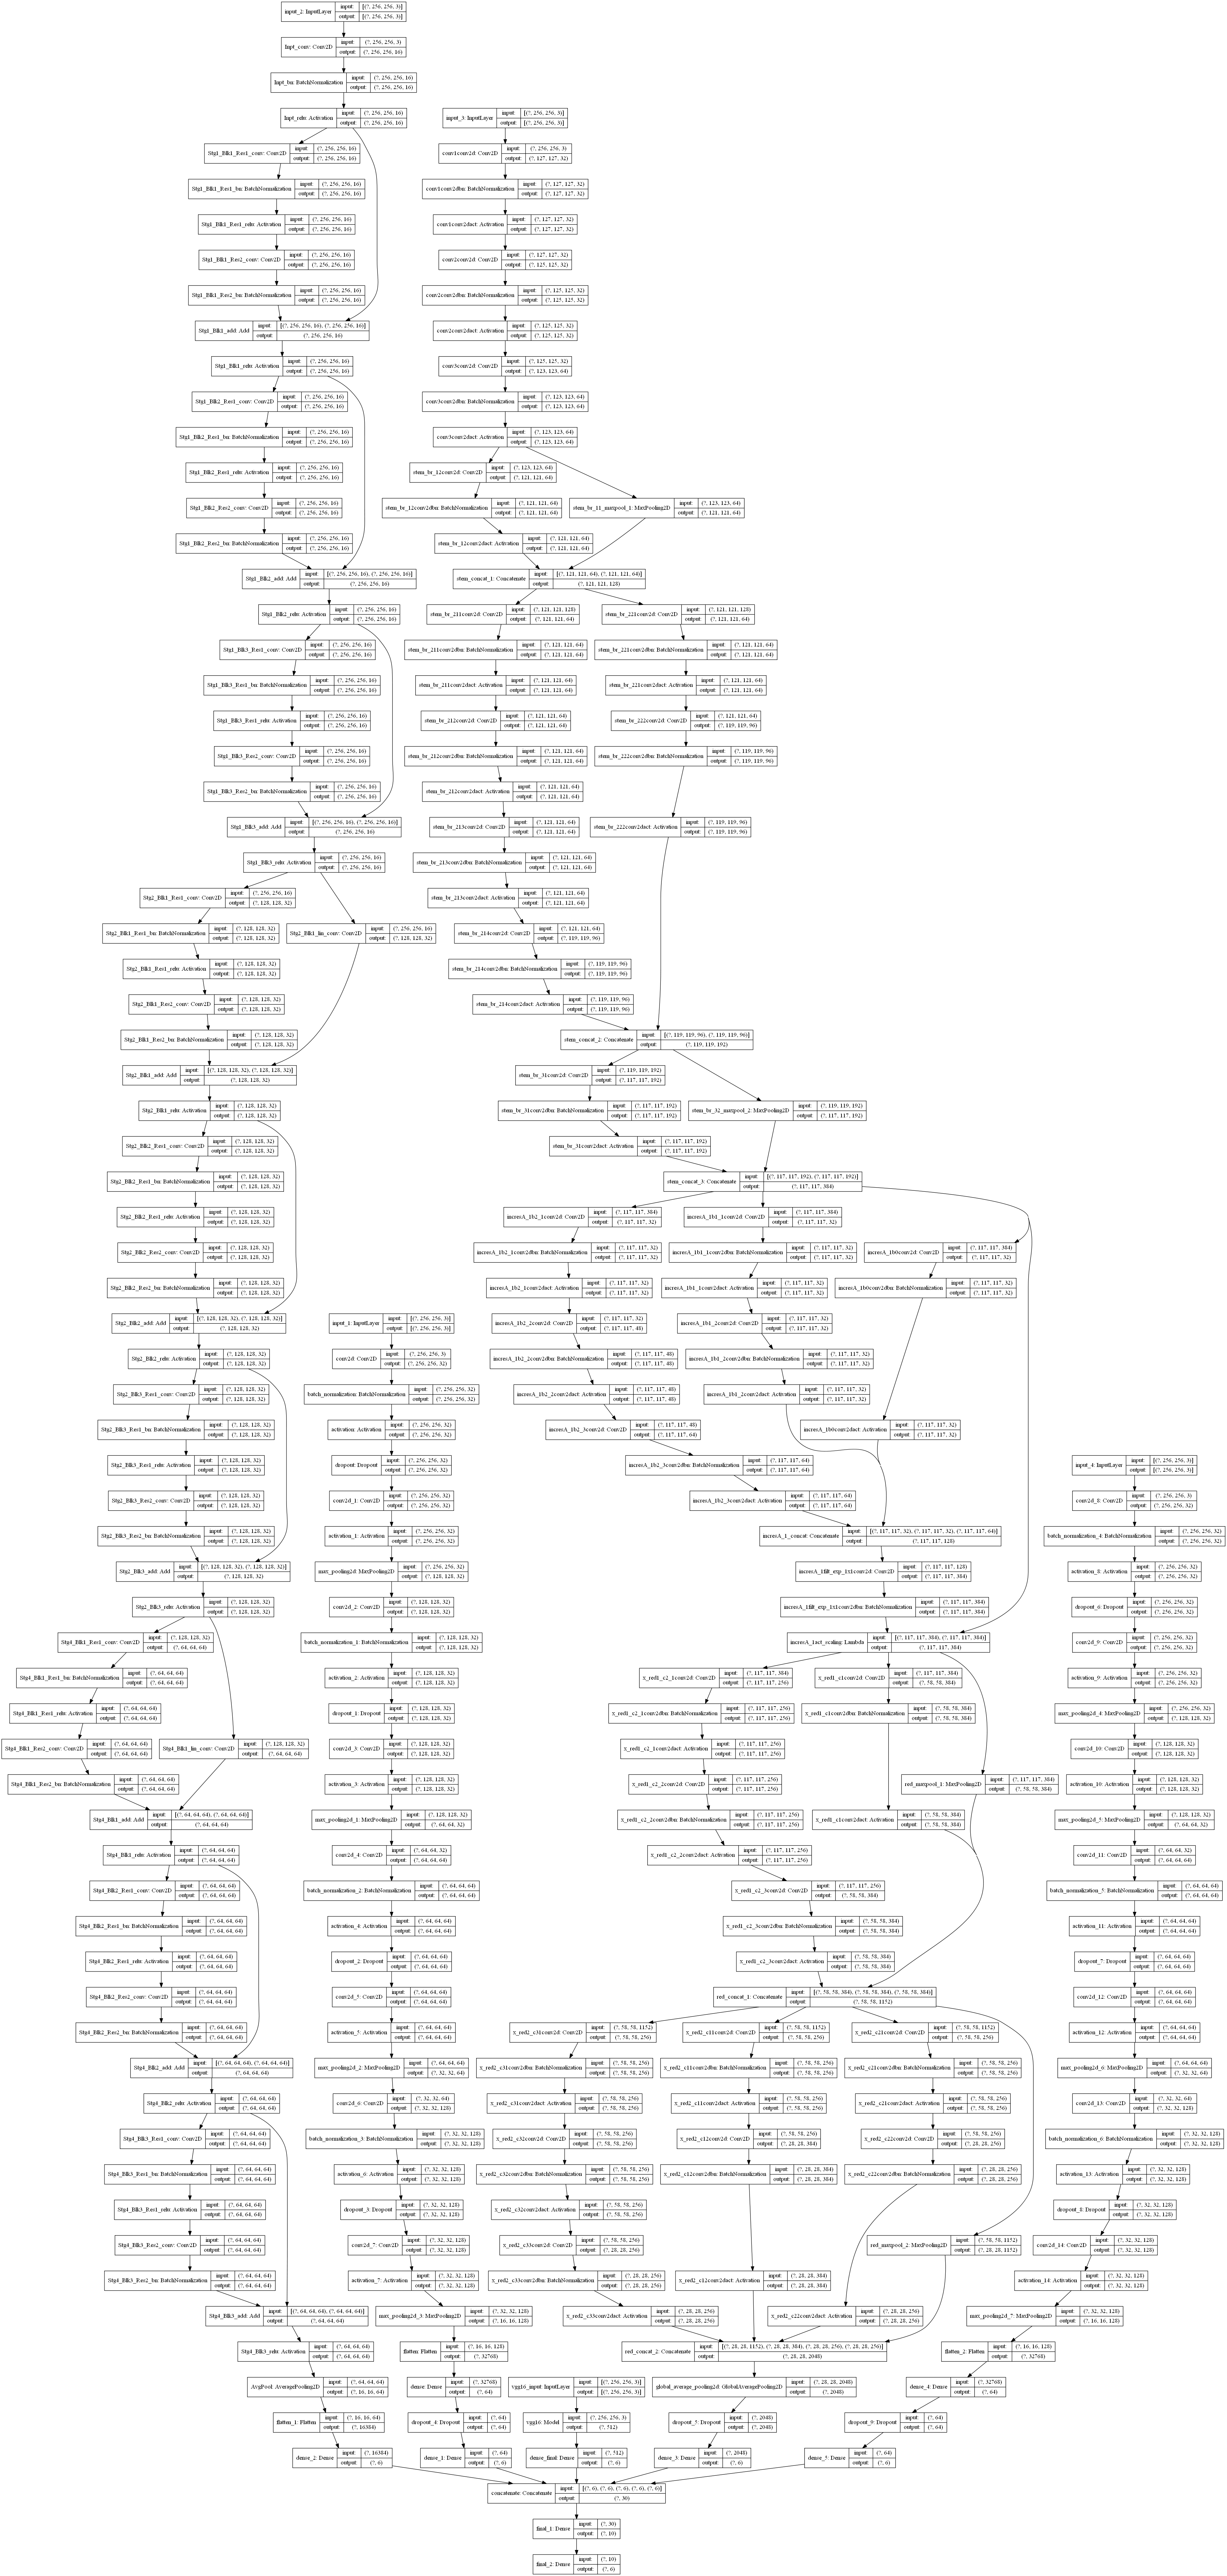

In [19]:
IPython.display.Image("model_plot.png")

In [20]:
# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # encode output data
    inputy_enc = inputy 
    # fit model
    history = model.fit(X, inputy_enc, epochs=20, verbose=1)
    return history

In [21]:
## make a prediction with a stacked model
def predict_stacked_model(model, inputX):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # make prediction
    return model.predict(X, verbose=0)

In [22]:
members = all_models
print('Loaded %d models' % len(members))
# define ensemble model
stacked_model = define_stacked_model(members)


Loaded 5 models


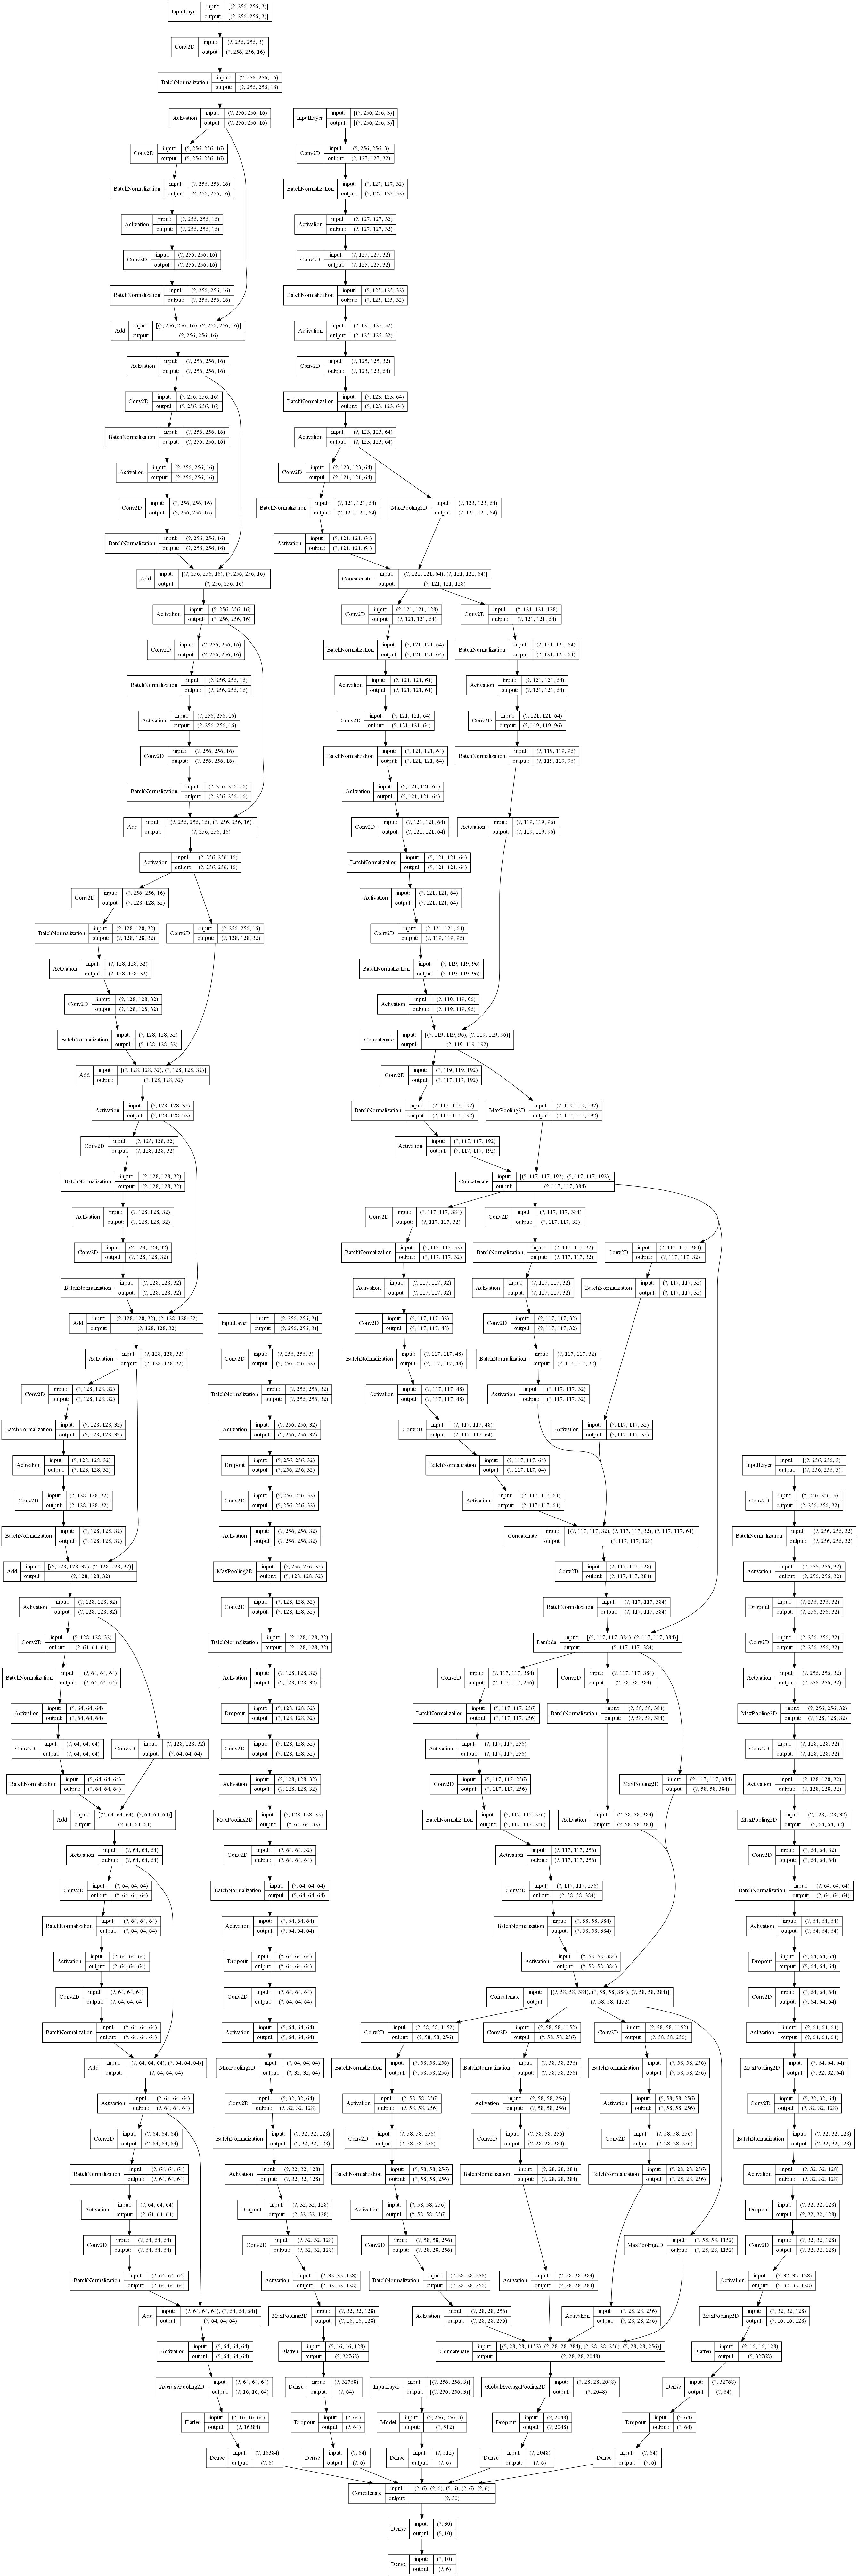

In [23]:
plot_model(stacked_model, 
           to_file='ensemble_model_5.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')

In [24]:
# fit stacked model on test dataset
history = fit_stacked_model(stacked_model, tsDat, tsLbl)
    


Epoch 1/20
20/20 [==============================] - 122s 6s/step - loss: 2.2925 - accuracy: 0.0452
Epoch 2/20
20/20 [==============================] - 110s 6s/step - loss: 2.0652 - accuracy: 0.0759
Epoch 3/20
20/20 [==============================] - 110s 5s/step - loss: 1.8376 - accuracy: 0.5089
Epoch 4/20
20/20 [==============================] - 109s 5s/step - loss: 1.5955 - accuracy: 0.7754
Epoch 5/20
20/20 [==============================] - 112s 6s/step - loss: 1.3741 - accuracy: 0.7706
Epoch 6/20
20/20 [==============================] - 113s 6s/step - loss: 1.2064 - accuracy: 0.7819
Epoch 7/20
20/20 [==============================] - 107s 5s/step - loss: 1.0746 - accuracy: 0.7900
Epoch 8/20
20/20 [==============================] - 105s 5s/step - loss: 0.9788 - accuracy: 0.8142
Epoch 9/20
20/20 [==============================] - 106s 5s/step - loss: 0.9037 - accuracy: 0.8611
Epoch 10/20
20/20 [==============================] - 105s 5s/step - loss: 0.8436 - accuracy: 0.8708
Epoch 11/

Text(0.5, 1.0, 'Accuracy evolution')

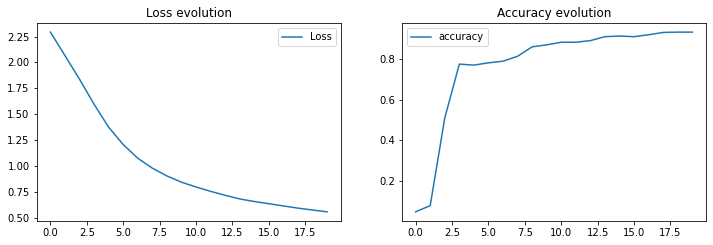

In [25]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
#plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [26]:
from sklearn.metrics import confusion_matrix
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, tsDat)
predout = argmax(yhat, axis=1)
testout = np.argmax(tsLbl,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 93.70%
              precision    recall  f1-score   support

      floral     0.9344    0.9268    0.9306       123
        lace     0.0000    0.0000    0.0000         9
   polkadots     1.0000    0.7222    0.8387        18
       print     0.9079    0.8313    0.8679        83
     stripes     1.0000    0.9565    0.9778        46
   unicolors     0.9341    1.0000    0.9659       340

    accuracy                         0.9370       619
   macro avg     0.7961    0.7395    0.7635       619
weighted avg     0.9239    0.9370    0.9289       619



C:\Users\DELL\anaconda3\envs\cogsys\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
modelname       = 'stacked_model_6'                                                                              
folderpath      = 'D:\\Intelligent Systems\\Pattern Recognition Systems\\PR-project\\jupytermodel\\'
filepath        = folderpath + modelname + ".hdf5"
stacked_model.save_weights(filepath)


In [28]:
stacked_model_test = define_stacked_model(members)
stacked_model_test.load_weights(filepath)


In [29]:
yhat = predict_stacked_model(stacked_model_test, tsDat)
predout = argmax(yhat, axis=1)
testout = np.argmax(tsLbl,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 93.70%
              precision    recall  f1-score   support

      floral     0.9344    0.9268    0.9306       123
        lace     0.0000    0.0000    0.0000         9
   polkadots     1.0000    0.7222    0.8387        18
       print     0.9079    0.8313    0.8679        83
     stripes     1.0000    0.9565    0.9778        46
   unicolors     0.9341    1.0000    0.9659       340

    accuracy                         0.9370       619
   macro avg     0.7961    0.7395    0.7635       619
weighted avg     0.9239    0.9370    0.9289       619



In [31]:
import tensorflow as tf

In [32]:
new_model = tf.keras.models.load_model(folderpath + modelname+"\\")


OSError: SavedModel file does not exist at: D:\Intelligent Systems\Pattern Recognition Systems\PR-project\jupytermodel\stacked_model_6\/{saved_model.pbtxt|saved_model.pb}

In [17]:
yhat = predict_stacked_model(new_model, tsDat)


NameError: name 'argmax' is not defined

In [19]:
predout = argmax(yhat, axis=1)
testout = np.argmax(tsLbl,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 86.11%
              precision    recall  f1-score   support

      floral     0.7208    0.9024    0.8014       123
        lace     0.0000    0.0000    0.0000         9
   polkadots     1.0000    0.0556    0.1053        18
       print     0.8889    0.4819    0.6250        83
     stripes     1.0000    0.8913    0.9425        46
   unicolors     0.8995    1.0000    0.9471       340

    accuracy                         0.8611       619
   macro avg     0.7515    0.5552    0.5702       619
weighted avg     0.8599    0.8611    0.8364       619



C:\Users\DELL\anaconda3\envs\cogsys\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
num = 555
#print(tsDat[num].shape,tsLbl[num],int(np.where(tsLbl[num]==1)[0]),labelname[int(np.where(tsLbl[num]==1)[0])])
print("predicted:",labelname[argmax(yhat[num])])
print("actual:",labelname[int(np.where(tsLbl[num]==1)[0])])

predicted: floral
actual: floral


In [37]:
int(np.where(yhat[num]==1)[0])

TypeError: only size-1 arrays can be converted to Python scalars

In [33]:
confusion   = metrics.confusion_matrix(testout,predout)
print(confusion)

[[114   0   0   3   0   6]
 [  0   0   0   4   0   5]
 [  0   0  13   0   0   5]
 [  8   0   0  69   0   6]
 [  0   0   0   0  44   2]
 [  0   0   0   0   0 340]]


In [6]:
labelname

Index(['floral', 'lace', 'polkadots', 'print', 'stripes', 'unicolors'], dtype='object')